In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

class LCM():

  def __init__(self,a,c,m,x0):
    self.a=a
    self.c=c
    self.m=m
    self.X=x0

  def draw(self):
    self.X=(self.a*self.X+self.c) % self.m
    return (float(self.X)/self.m)


In [ ]:
rand=LCM(5,3,9,1)
for i in range(10):
  print(rand.draw()*9)

8.0
7.0
2.0
4.0
5.0
1.0
8.0
7.0
2.0
4.0


(array([199., 222., 201., 199., 226., 181., 187., 212., 194., 180.]),
 array([6.98491931e-10, 9.99418583e-02, 1.99883716e-01, 2.99825574e-01,
        3.99767431e-01, 4.99709289e-01, 5.99651146e-01, 6.99593004e-01,
        7.99534862e-01, 8.99476719e-01, 9.99418577e-01]),
 <a list of 10 Patch objects>)

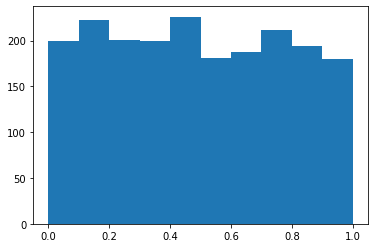

In [ ]:
N=1000
#t=LCM(a=4,c=1,m=9,x0=0,N=2*N) #RATHER GOOD
t=LCM(a=1664525,c=1013904223,m=2**32,x0=3,N=2*N)
#t=LCM(a=1,c=1,m=30,x0=3,N=2*N) #GREAT HISTOGRAM
#t=LCM(a=2,c=0,m=9,x0=3,N=2*N) #VERY POOR
#t=LCM(a=4,c=1,m=9,x0=0,N=2*N) #RATHER GOOD
#t=LCM(a=1,c=1,m=30,x0=3,N=2*N) #GREAT HISTOGRAM
#t=LCM(a=17,c=6,m=31,x0=3,N=2*N)
#t=LCM(a=1664525,c=1013904223,m=2**32,x0=3,N=2*N)
plt.hist(t)

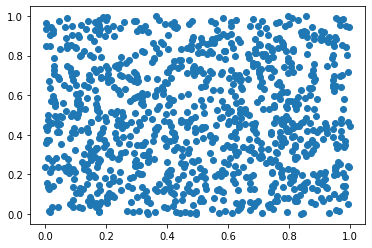

In [ ]:
x=[]
y=[]
for i in range(N):
  x.append(t[2*i])
  y.append(t[2*i+1])

plt.scatter(x,y)

In [ ]:
def FreqTest(t):
  X=0
  for i in t:
    X += 2*round(i)-1
  X=X/(len(t)**0.5)
  X=abs(X)
  return math.erfc( X/(2.**0.5))
#Frequency (Monobit) Test


def SpectralTest(t):
  X=[]
  N=len(t)
  for i in t:
    X.append( 2*round(i)-1)

  S=np.fft.fft(np.array(X))
  S=S[0:round(N/2)]
  S=np.absolute(S)
  T=math.sqrt( math.log(1./0.05)*N  )
  N0=0.95*N/2.
  N1=0
  for i in S:
    if(i < T):
      N1+=1
  d=(N1-N0)/math.sqrt(N*0.95*0.05/4.  )
  print(N,N1,N0,d)
  return math.erfc( abs(d)/(2.**0.5)),S

#Spectral test

2001 958 950.4749999999999 1.5437115402320467
0.0376151879726706 0.12265822935738603


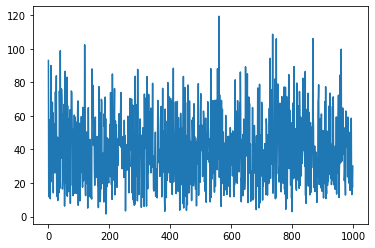

In [ ]:
#t=[1,1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,]

ft=FreqTest(t)
st,S=SpectralTest(t)
print(ft,st)
plt.plot(S)

BOX-COUNTING

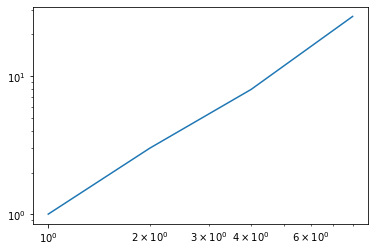

In [ ]:
import math as math
plt.loglog([1,2,4,8],[1,3,8,27])


In [ ]:
#SERPINSKI TRIANGLE
x=np.log([1,2,4,8,16,32])
y=np.log([1,3,8,27,81,234])

np.polyfit(x,y,1)

array([ 1.58203925, -0.02085495])

In [ ]:
x=np.log([1,3,9,27,81,234,702,2106])
y=np.log([1,8,64,512,4096,32768,262144,2097152])

np.polyfit(x,y,1)

array([ 1.90444306, -0.01785767])